# Cats and Dogs - CNN 버전

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# 다운로드 및 압축풀기 

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-03-19 15:58:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 142.250.148.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  66.3MB/s    in 1.0s    

2022-03-19 15:58:10 (66.3 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import shutil

if os.path.exists('/content/cats_and_dogs_filtered/'):    # 작업 디렉토리는 cats_and_dogs_filtered
    
    shutil.rmtree('/content/cats_and_dogs_filtered/')
    print('/content/cats_and_dogs_filtered/  is removed !!!')

In [4]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r') as target_file:

    target_file.extractall('/content/cats_and_dogs_filtered/') 

# 데이터 개수 확인

In [5]:
import os
import glob

# 데이터 정답 (label) 개수 및 종류 확인

cats_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats')
dogs_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs')

cats_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats')
dogs_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs')

print('cats train file nums = ', len(cats_train_list))
print('dogs train file nums = ', len(dogs_train_list))
print('cats validation file nums = ', len(cats_validation_list))
print('dogs validation file nums = ', len(cats_validation_list))
print('=================================================')

cats train file nums =  1000
dogs train file nums =  1000
cats validation file nums =  500
dogs validation file nums =  500


# train 디렉토리에서 image data 읽어서 x_train, y_train 생성

In [6]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

train_base_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/'

train_label_list = os.listdir(train_base_dir)    # 정답이름

print('train label # => ', len(train_label_list))

start_time = datetime.now()

for train_label_name in train_label_list:

    # cats => 0.0,  dogs => 1.0 변환
    if train_label_name == 'cats':
        label_num = 0.0
    elif train_label_name == 'dogs':
        label_num = 1.0

    # 이미지 파일 읽어오기

    file_path = train_base_dir + train_label_name

    train_img_file_list = glob.glob(file_path+'/*.jpg')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .jpg 파일 읽어서 리스트에 저장
    
    for train_img_file in train_img_file_list:

        train_img = cv2.imread(train_img_file, cv2.IMREAD_COLOR) 

        train_img = cv2.resize(train_img, dsize=(224,224))    # (224,224) 변환

        train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)

        image_list.append(train_img)
        label_list.append(label_num) 

# numpy 변환

x_train = np.array(image_list).astype('float32')
y_train = np.array(label_list).astype('float32')

print('x_train.shape = ', x_train.shape, ', y_train.shape = ', y_train.shape)

end_time = datetime.now()

print('train data generation time => ', end_time-start_time)

train label # =>  2
x_train.shape =  (2000, 224, 224, 3) , y_train.shape =  (2000,)
train data generation time =>  0:00:09.379418


# validation 디렉토리로부터 이미지 읽어서 x_val, y_val 생성

In [7]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

validation_base_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/'

validation_label_list = os.listdir(validation_base_dir)    # 정답이름

print('validation label # => ', len(validation_label_list))

start_time = datetime.now()

for validation_label_name in validation_label_list:

    # cats => 0.0,  dogs => 1.0 변환
    if validation_label_name == 'cats':
        label_num = 0.0
    elif validation_label_name == 'dogs':
        label_num = 1.0

    # 이미지 파일 읽어오기

    file_path = validation_base_dir + validation_label_name

    validation_img_file_list = glob.glob(file_path+'/*.jpg')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .jpg 파일 읽어서 리스트에 저장
    
    for validation_img_file in validation_img_file_list:

        validation_img = cv2.imread(validation_img_file, cv2.IMREAD_COLOR) 

        validation_img = cv2.resize(validation_img, dsize=(224,224))    # (224,224) 변환

        validation_img = cv2.cvtColor(validation_img, cv2.COLOR_BGR2RGB)

        image_list.append(validation_img)
        label_list.append(label_num)

# numpy 변환

x_val = np.array(image_list).astype('float32')
y_val = np.array(label_list).astype('float32')

print('x_val.shape = ', x_val.shape, ', y_val.shape = ', y_val.shape)

end_time = datetime.now()

print('validation data generation time => ', end_time-start_time)

validation label # =>  2
x_val.shape =  (1000, 224, 224, 3) , y_val.shape =  (1000,)
validation data generation time =>  0:00:03.049193


# validation data 로 부터 test data 분리 (분리 비율 5 : 5)

In [8]:
import numpy as np

# validation data random shuffle

s = np.arange(len(x_val))

# index random shuffle

np.random.shuffle(s)

# x_val, y_val 재 생성

x_val = x_val[s]
y_val = y_val[s]

# validation, test data 분리
ratio = 0.5

split_num = int(ratio*len(x_val))

print('split num => ', split_num)

x_test = x_val[0:split_num]
y_test = y_val[0:split_num]

x_val = x_val[split_num:]
y_val = y_val[split_num:]

print('x_val.shape = ', x_val.shape, ', y_val.shape = ', y_val.shape)
print('x_test.shape = ', x_test.shape, ', y_test.shape = ', y_test.shape)

split num =>  500
x_val.shape =  (500, 224, 224, 3) , y_val.shape =  (500,)
x_test.shape =  (500, 224, 224, 3) , y_test.shape =  (500,)


# 이미지 데이터 정규화

In [9]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# CNN 모델 구축

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='SAME', input_shape=(224,224,3))) 
model.add(Conv2D(32, (3,3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu', padding='SAME'))
model.add(Conv2D(64, (3,3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [11]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './cats_and_dogs_Native_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist = model.fit(x_train, y_train,
                 epochs=30, batch_size=16, 
                 validation_data=(x_val, y_val))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/30
125/125 [==============================] - 30s 150ms/step - loss: 0.7019 - acc: 0.4840 - val_loss: 0.6931 - val_acc: 0.5040
Epoch 2/30
125/125 [==============================] - 18s 144ms/step - loss: 0.6933 - acc: 0.4880 - val_loss: 0.6931 - val_acc: 0.5040
Epoch 3/30
125/125 [==============================] - 18s 142ms/step - loss: 0.6933 - acc: 0.4830 - val_loss: 0.6931 - val_acc: 0.4960
Epoch 4/30
125/125 [==============================] - 18s 142ms/step - loss: 0.6932 - acc: 0.4810 - val_loss: 0.6931 - val_acc: 0.5040
Epoch 5/30
125/125 [==============================] - 18s 142ms/step - loss: 0.6932 - acc: 0.4970 - val_loss: 0.6932 - val_acc: 0.4960
Epoch 6/30
125/125 [==============================] - 18s 142ms/step - loss: 0.6932 - acc: 0.4800 - val_loss: 0.6931 - val_acc: 0.5040
Epoch 7/30
125/125 [==============================] - 18s 143ms/step - loss: 0.6932 - acc: 0.4990 - val_loss: 0.6932 - val_acc: 0.4960
Epoch 8/30
125/125 [==============================] - 1

In [13]:
model.evaluate(x_test, y_test)

16/16 [==============================] - 4s 152ms/step - loss: 0.6931 - acc: 0.5040


[0.6931345462799072, 0.5040000081062317]

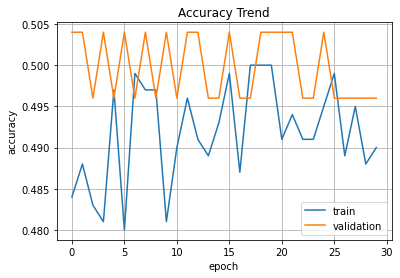

In [14]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

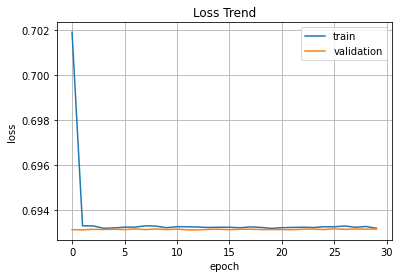

In [15]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()